In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_csv('/Users/HP/Downloads/Datasets/cars93.csv')

In [3]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
Unnamed: 0            93 non-null int64
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64


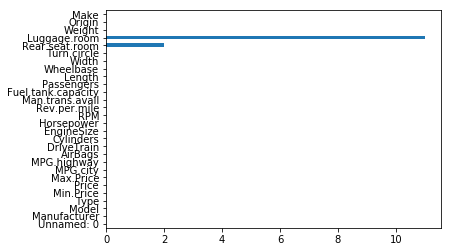

In [5]:
A.isnull().sum().plot(kind='barh')

In [6]:
Q= pd.DataFrame(A.isnull().sum(), columns=['missing_vals'])
Q[Q.missing_vals >0]

,missing_vals
Rear.seat.room,2
Luggage.room,11


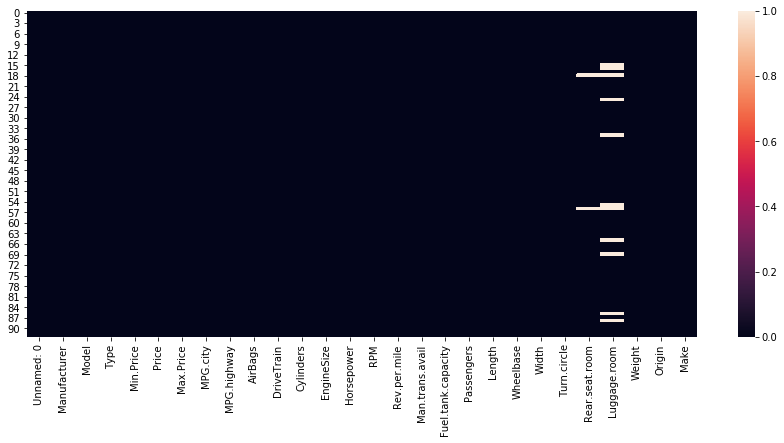

In [8]:
b=plt.subplots(figsize=(15,6))
sb.heatmap(A.isnull())

In [9]:
CAT=[]
CON=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)

In [11]:
CON

['Unnamed: 0',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [12]:
from sklearn.preprocessing import Imputer
imp=Imputer()
c=pd.DataFrame(imp.fit_transform(A[CON]), columns=CON)

In [14]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 19 columns):
Unnamed: 0            93 non-null float64
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null float64
MPG.highway           93 non-null float64
EngineSize            93 non-null float64
Horsepower            93 non-null float64
RPM                   93 non-null float64
Rev.per.mile          93 non-null float64
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null float64
Length                93 non-null float64
Wheelbase             93 non-null float64
Width                 93 non-null float64
Turn.circle           93 non-null float64
Rear.seat.room        93 non-null float64
Luggage.room          93 non-null float64
Weight                93 non-null float64
dtypes: float64(19)
memory usage: 13.9 KB


In [15]:
d=pd.DataFrame(A[CAT])

In [16]:
d.head()

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i


In [17]:
E=c.join(d)

In [18]:
E.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,...,Weight,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,1.0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,...,2705.0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,2.0,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,...,3560.0,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,3.0,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,...,3375.0,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,4.0,30.8,37.7,44.6,19.0,26.0,2.8,172.0,5500.0,2535.0,...,3405.0,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
4,5.0,23.7,30.0,36.2,22.0,30.0,3.5,208.0,5700.0,2545.0,...,3640.0,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i


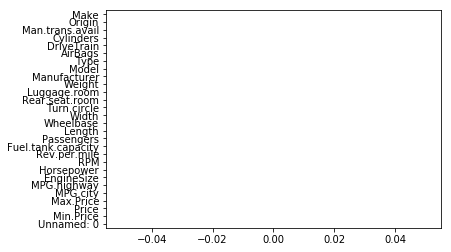

In [19]:
E.isnull().sum().plot(kind='barh')